# Running ancIBD on X chromosomes (under construction, available from version xxx)

Authors: Yilei Huang (yilei_huang AT eva.mpg.de)

This notebook guides you through the usage of ancIBD on X chromosomes. It assumes some familiarity with the usage of ancIBD on autosomes. If you haven't done so, we recommend you reading that first. The test data, along with a few other auxiliary files need, for X chromosome IBD calling can be downloaded from [this link](https://share.eva.mpg.de/index.php/s/YR5TPYRxSeKLTd7). It consists two parents (GRG030, GRG033) and three of their children (two sons GRG029, GRG036 and one daughter GRG090), previously published in [Rivollat et al.](https://www.nature.com/articles/s41586-023-06350-8)

## Notes on imputing X chromosomes

Imputing X chromosomes basically follows the same procedure as that of autosomes. We refer you to the official [GLIMPSE documentation](https://odelaneau.github.io/GLIMPSE/glimpse1/tutorial_chrX.html) on imputing X chromosomes. Notably, one needs to specify the sample ploidy (aka males being haploid and females being diploid) in both the genotype-lieklihood calculation and the imputation steps.

## Calling X chromosome IBD with bash command

You can run ancIBD on chX via the bash command "ancIBDX". You need at least

* A vcf file of imputed chX
* A tab-separated file, the first column being sample ID (must match with the vcf file) and the second column being the sample's ploidy (see the ploidy.txt in the download link for an example)
* A file listing the 1240k markers on chX (included in the download link)
* A genetic map for chX (included in the download link)

In the following command, we assume that all input files reside in folder ./data/ancIBDX/ Please change this if your directory strucutre differs.

In [1]:
!ancIBDX --vcf ./data/ancIBDX/Gurgy_quintet.chX.vcf.gz --ch X \
    --marker_path ./data/ancIBDX/snps_bcftools_chX_1240k.csv \
    --map_path ./data/ancIBDX/v51.1_1240k.chrX.map \
    --af_column variants/RAF --ploidy ./data/ancIBDX/ploidy.txt --min 8 --bin 8,12,16,20

Print downsampling to 1240K...
Running bash command: 
bcftools view -Ov -o /mnt/archgen/users/yilei/tools/ancIBD/docs/data/ancIBDX/chX.1240k.vcf -T ./data/ancIBDX/snps_bcftools_chX_1240k.csv -M2 -v snps ./data/ancIBDX/Gurgy_quintet.chX.vcf.gz
Finished BCF tools filtering to target markers.
Deleting previous HDF5 file at path_h5: /mnt/archgen/users/yilei/tools/ancIBD/docs/data/ancIBDX/chX.h5...
Converting to HDF5...
Finished conversion to hdf5!
Merging in LD Map..
Lifting LD Map from eigenstrat to HDF5...
Loaded 46587 variants.
Loaded 5 individuals.
Loaded 49704 Chr.X 1240K SNPs.
Intersection 46587 out of 46587 HDF5 SNPs
Finished Chromosome X.
Adding map to HDF5...
Calculating in sample allele frequencies and saving at hdf5 column AF_SAMPLE
Adding Allele Frequencies to HDF5...
Loaded 46587 variants.
Finshed merged in allele frequencies into /mnt/archgen/users/yilei/tools/ancIBD/docs/data/ancIBDX/chX.h5
Transformation complete! Find new hdf5 file at: /mnt/archgen/users/yilei/tools/ancIBD

You will get two output files in the same folder as the input vcf files (unless you specify the output folder via --out). The chX.tsv file contain all detected IBD segments, one per line. The ibd_ind.tsv contain IBD summary statistics for all pairwise individuals. For more command line options, use ancIBDX -h.

## visualize chX IBD

In [3]:
from ancIBD.run import run_plot_pair_X

We can visualize the imputed genotype and the called IBD via function `ancIBD.run.run_plot_pair_X`. This helps to sanity check your results, and, as you will see in the following, to check if there are artificial gaps in the called IBD due to imputation errors.

### between two males
The two males GRG029 and GRG036 are full-siblings of one another; therefore, they inherit one copy of chX from their mother. Because of recombination on the maternal side, they are "separated" by one meiosis, and their shared IBD reflect this. In the plot that follows, the called IBD are shown by the thick blue bars at the top. The small grey dots are sites with "opposing homozygote" (two individuals are homozygous for different alleles). Because in IBD region, the individuals necessarily share one identical haplotype, lack of opposing homozygotes is evidence for IBD. The brown curves are posterior probability of being in the "non-IBD" state of the HMM.

Min. Error added: 0.001
Phase. Error added: 0.01
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 2595


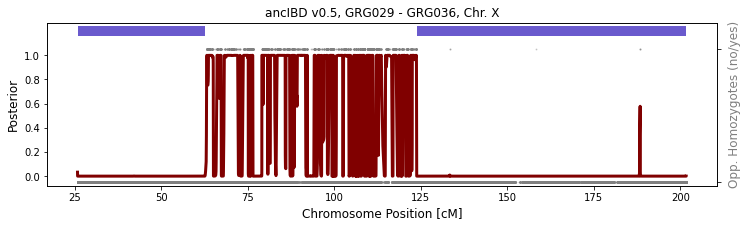

In [9]:
run_plot_pair_X(folder_in="./data/ancIBDX/ch", 
                iids = ['GRG029', 'GRG036'], ploidy=(1, 1), 
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)

Now let's see a father-son pair. As the son does not receive any copy of chX from his father, they are expected to share no IBD on chX. As expected, you can see that the small gray dots all over the region.

Min. Error added: 0.001
Phase. Error added: 0.01
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 8427


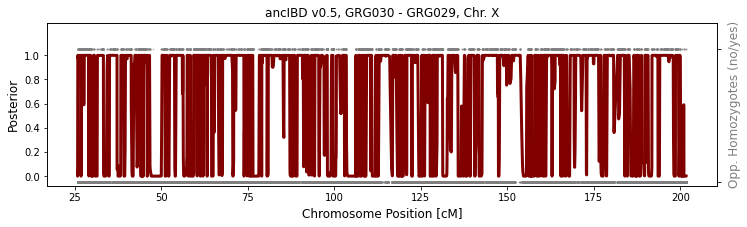

In [10]:
run_plot_pair_X(folder_in="./data/ancIBDX/ch", 
                iids = ['GRG030', 'GRG029'], ploidy=(1, 1), 
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)

### between two females
GRG033 and GRG090 is a mother-daughter pair. As the daughter get one copy of chX from her mother, they are expected to share IBD along the entire chromosome. You can see that there is a small artificial gap at ~192cM. This is due to imputation errors.

Min. Error added: 0.001
Phase. Error added: 0.01
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 5


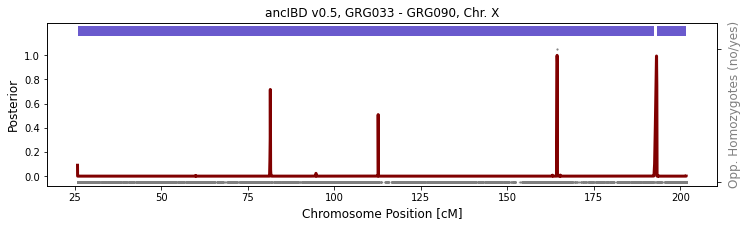

In [11]:
run_plot_pair_X(folder_in="./data/ancIBDX/ch", 
                iids = ['GRG033', 'GRG090'], ploidy=(2, 2), 
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)

### between one male and one female
GRG033 and GRG036 is a mother-son pair. As the son inherits one copy of chX from his mother, they are expected to share IBD on the entire X chromosome. As above, the called IBD are interrupted by imputed errors. But still, you get the general idea that they share IBD throughout. 

Min. Error added: 0.001
Phase. Error added: 0.01
Filtering to 46587/46587 SNPs with GP data (on target iids)
Plotting 46587 markers
# of oppo homos: 8


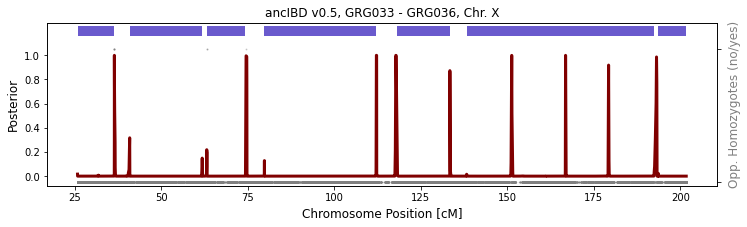

In [12]:
run_plot_pair_X(folder_in="./data/ancIBDX/ch", 
                iids = ['GRG033', 'GRG036'], ploidy=(2, 1), 
                xlim=[], p_col="variants/RAF", plot=True, min_cm=8)